## Домашнее задание


1. Прочитайте данные из файлов train.npz и test.npz Каждый файл содержит 2 массива - samples(данные) и answers(класс). $samples_i \in R, answers_i \in \{0,1,2\}$
2. Выделите данные, соответствующие каждому классу 0,1,2 на обучающей выборке

In [1]:
import pandas as pd
import numpy as np

In [2]:
with np.load('data/Корнева_test.npz') as test_npz:
    data_test = pd.DataFrame({'samples': test_npz['samples'], 'answers': test_npz['answers']})
data_test.head()

,samples,answers
0,19.502412,0.0
1,-9.694394,0.0
2,-12.070419,0.0
3,-0.825515,0.0
4,9.158841,0.0


In [3]:
with np.load('data/Корнева_train.npz') as train_npz:
    data_train = pd.DataFrame({'samples': train_npz['samples'], 'answers': train_npz['answers']})
data_train.head()

,samples,answers
0,-3.343536,0.0
1,11.698493,0.0
2,-0.252888,0.0
3,14.500178,0.0
4,-20.093602,0.0


In [4]:
data_train_group = data_train.groupby('answers')['samples'].apply(np.array).reset_index(name='list')
print(data_train_group.head())
samples = np.array(data_train_group['list'])

   answers                                               list
0      0.0  [-3.3435355026297726, 11.69849274217298, -0.25...
1      1.0  [8.527594279907033, 16.222406444410222, 14.424...
2      2.0  [-2.0386628137023695, -3.5552679367861098, -2....


3. Визуализируйте выборку для каждого класса и сделайте предположение о виде функции распредления

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

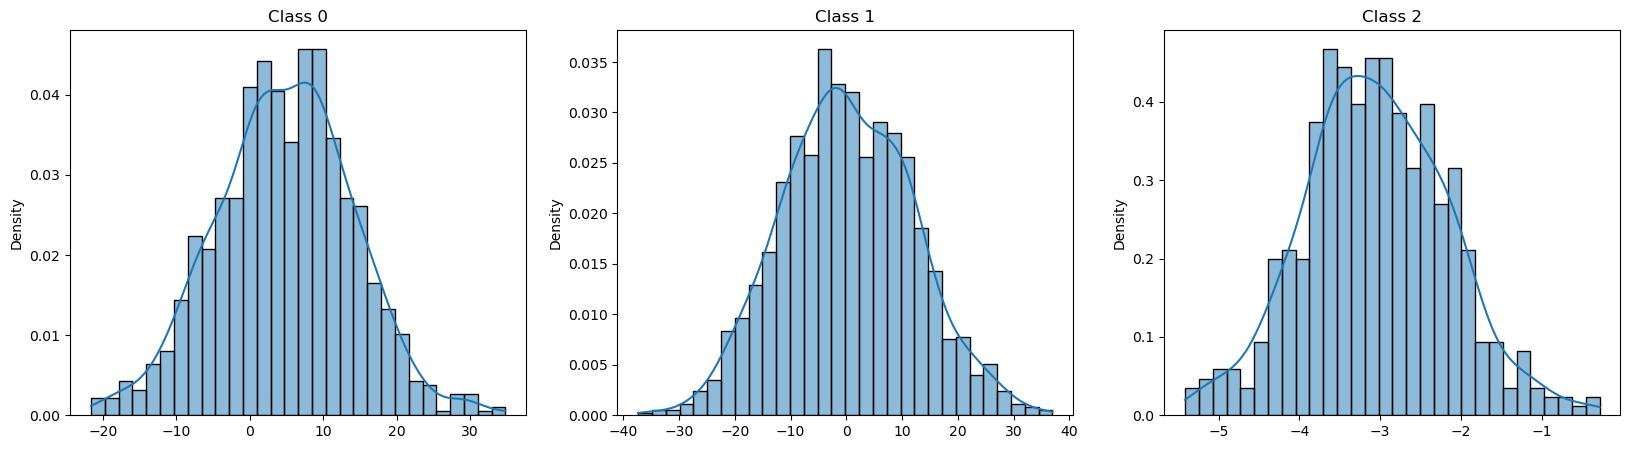

In [6]:
fig, axs = plt.subplots(figsize=(20, 5), ncols=3)
for i in range(3):
    x = np.array(range(1, samples[i].shape[0]+1, 1))
    y =  samples[i]
    sns.histplot(y, bins = 30, kde=True, stat="density", ax=axs[i]).set(title=f'Class {i}')

4. Сделайте состоятельные точечные оценки параметров распределений. (Видов распределений вам может встретиться всего 3 - равномерное, нормальное и экспоненциальное. Для равномерного $U(a,b)$ распределения сделать оценки a и b, для нормального $N(\mu, \sigma^2)$ оценки $\mu$ и $\sigma^2$, для экспоненциального $Exp(\lambda) $ оценку $\lambda$)


In [7]:
def params_class0(sample): #normal
    mu = np.mean(sample)
    sigma = np.std(sample)
    n = len(sample)
    sigma_squared = sigma**2
    return [mu, sigma_squared, sigma]
def params_class1(sample): #uniform
    a = min(sample)
    b = min(sample)
    return [a, b]
def params_class2(sample): #exponential
    lamb = 1/np.mean(sample)
    return lamb

In [8]:
samples1 = samples[0]
samples2 = samples[1]
samples3 = samples[2]

In [9]:
p0 = params_class0(samples1)
p1 = params_class0(samples2)
p2 = params_class0(samples3)
params = [p0, p1, p2]
print(f'CLass0: normal, mu={p0[0]}, sigma squared={p0[1]}')
print(f'Class1: normal, mu={p1[0]}, sigma squared={p1[1]}')
print(f'Class2: normal, mu={p2[0]}, sigma squared={p2[1]}')

CLass0: normal, mu=4.777858718279028, sigma squared=85.06214794345567
Class1: normal, mu=0.24311422670324506, sigma squared=138.834595135613
Class2: normal, mu=-3.0510492197848333, sigma squared=0.7854423655399535


5. Постройте графики распределений для исходной выборки и для выборки сгенерированной с параметрами, найденными с помощью точечных оценок

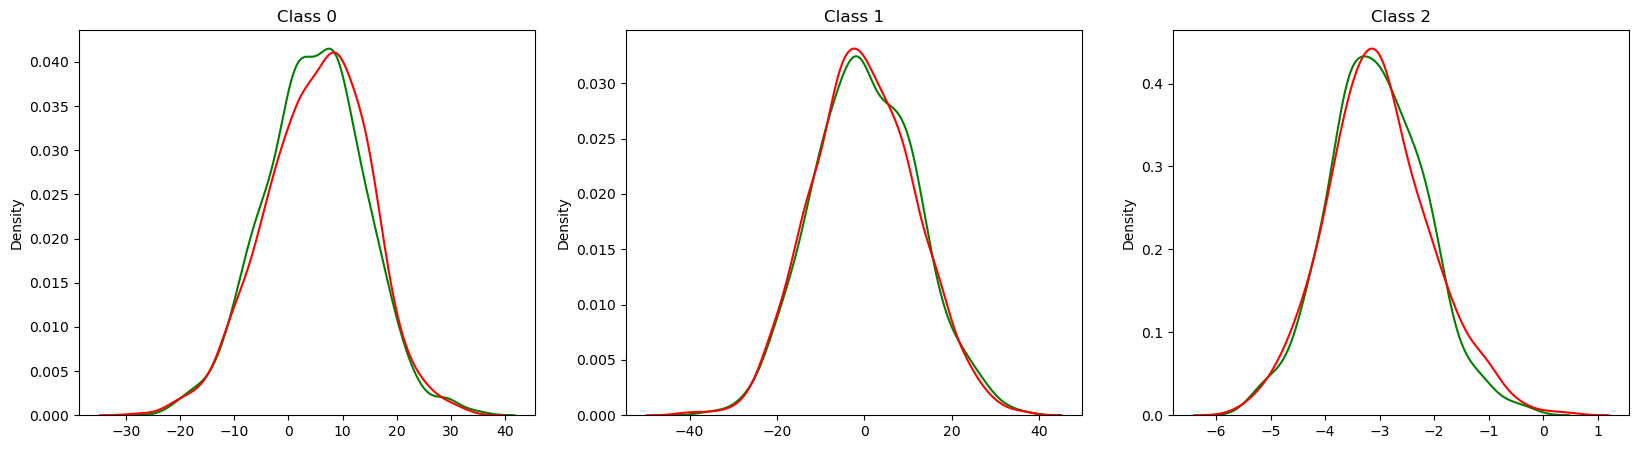

In [10]:
fig, axs = plt.subplots(figsize=(20, 5), ncols=3)
for i in range(3):
    x = np.array(range(1, samples[i].shape[0]+1, 1))
    y =  samples[i] # распределение исходной выборки
    sns.kdeplot(y, ax=axs[i], color = 'green').set(title=f'Class {i}')
    y1 = np.random.normal(params[i][0], params[i][2], size=len(x)) # распределение выборки с параметрами
    sns.kdeplot(y1, ax=axs[i], color = 'red')

6. Посчитайте статистику критерия Колмогорова для проверки гипотезы о том, что исходные данные являются реализацией случайной величины с функцией распределения, полученной по точечным оценкам 

Пусть   $D_n = \displaystyle \sup _{-\infty < x < \infty} |\hat F _n (x) - F(x)|$,

где $\hat F _n (x) = {1 \over n} \displaystyle \sum _{i=1} ^n I_{\{X_i \leq x\}}$ - это эмпирическая функция распределения, $F(x)$ - функция распределения полученная с помощью оценок.

Посчитайте $\sqrt{N}*D_N$, где $N$ - число элементов выборки для каждой из выборок 1,2,3

При каком уровне значимости мы можем принять гипотезу о принадлежности выборки соответствующему распределению?

In [11]:
from scipy.stats import norm

for i in range(3):
    n = samples[i].shape[0]
    cdf_n = np.arange(1, n+1)/n   # предполагается, что все элементы samples различны в силу постановки задачи (классификации)
    cdf_0 = norm.cdf(np.sort(samples[i]), params[i][0], params[i][2])
    d = max(abs(cdf_n-cdf_0))
    print(f'Class {i}: {(np.sqrt(n)*d).round(5)}')

Class 0: 0.64122
Class 1: 0.71573
Class 2: 0.61485


Из семинара 4 таблица квантилей функции $K(x)$ имеет вид:
|$\alpha$           |$0.5$  |$0.15$ |$0.1$  |$0.05$ |$0.025$    |$0.01$ |$0.001$    |
|-------------------|-------|-------|-------|-------|-----------|-------|-----------|
|$x_{1-\alpha}$     |$0.83$ |$1.14$ |$1.23$ |$1.36$ |$1.48$     |$1.63$ |$1.95$     |

Гипотеза будет принята при таких значениях $\alpha$, при которых $x_{1-\alpha} > \sqrt{N}*D_N$. В данном случае эмпирическая функция распределения очень близка к гипотетической, а потому по данной таблице будет принята при любом значении $\alpha$ начиная с некоторого $\alpha >= 0.5$.

7. На основе посчитанных параметров распределения постройте байесовский классификатор

In [12]:
def classification_bayes(sample):
    # плотности распределения
    pdf_0 = norm.pdf(sample, params[0][0], params[0][2])
    pdf_1 = norm.pdf(sample, params[1][0], params[1][2])
    pdf_2 = norm.pdf(sample, params[2][0], params[2][2])
    
    # вероятности
    p_0 = samples[0].shape[0]/data_train.shape[0]
    p_1 = samples[1].shape[0]/data_train.shape[0]
    p_2 = samples[2].shape[0]/data_train.shape[0]
    
    return np.argmax([pdf_0*p_0, pdf_1*p_1, pdf_2*p_2], axis = 0)

8. Для каждого класса на тестовой выборке посчитайте количество True Positive, False Positive и False Negative.
  

Перед нами стоит задача бинарной классификации: 

$X \rightarrow Y , Y = \{+1, −1\}$

Предположим, что мы используем алгоритм классификации $a(x_i) = y_i$

Класс с меткой “+1” называется **positive**

Класс с меткой “-1” называется **negative**

## Матрица ошибок

Для классификации ответов нашего бинарного классификатора используется **матрица ошибок (confusion matrix)**:
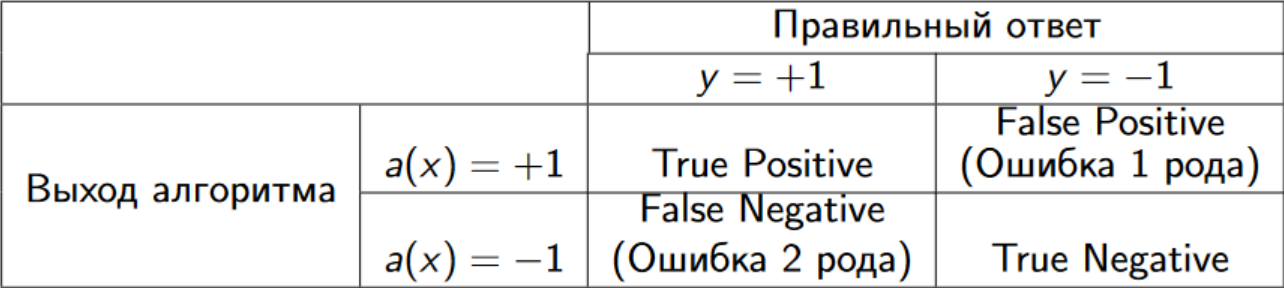



Рассмотрим теперь классификацию на более, чем 2 класса.

Для каждого класса $C_j$ мы можем рассмотреть задачу бинарной классификации $B_j$: 

$X \rightarrow Y , Y = \{+1, −1\}$, где $Y=+1$ если $a(x_i) = C_j$, иначе $Y=-1$

Значения True Positive, False Positive, False Negative для класса $C_j$ есть соответствующие значения для задачи бинарной классификации $B_j$ 




In [13]:
samplesTest = data_test['samples']
answersTest = data_test['answers']

def errors(sample, correct_answer, cl):
    tp, fp, fn = 0, 0, 0
    predict = classification_bayes(sample)
    for i in range(len(sample)):
        if predict[i] == cl:
            if correct_answer[i] == cl:
                tp += 1
            else: fp += 1
        elif correct_answer[i] == cl:
            fn += 1
    return [tp, fp, fn]

for i in range(3): 
    print(i,'-',errors(samplesTest,answersTest,i)) 


0 - [22, 21, 78]
1 - [64, 76, 36]
2 - [97, 20, 3]
